In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
ls

dataCheck.ipynb  README.md  street2shop/


In [3]:
idPATH = 'street2shop/CLOTHING/Blouse/'

In [4]:
files = sorted([f for f in os.listdir(idPATH)]) #sorted by id
files[:5]

['id_00004848', 'id_00005025', 'id_00005661', 'id_00005855', 'id_00006033']

In [8]:
items = sorted([i for i in os.listdir(idPATH+files[2])])
items

['comsumer_01.jpg', 'shop_01.jpg']

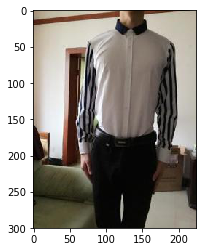

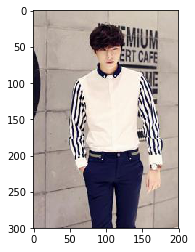

In [9]:
for i in range(len(items)):
    img = np.array(Image.open(idPATH+files[2]+'/'+items[i]))
    plt.imshow(img)
    plt.show()

## bounding boxの読み込み
ファイル読み込みの際に改行コードを削除する必要がある。

In [10]:
with open('list_bbox_consumer2shop.txt','r') as f:
    texts = f.readlines()
    for i,text in enumerate(texts):
        texts[i] = text.strip()

In [13]:
texts[1]

'image_name clothes_type source_type x_1 y_1 x_2 y_2'